In [52]:
from typing import Dict ,TypedDict
from langgraph.graph import StateGraph , START , END
from IPython.display import Image , display

In [53]:
#creating agent state

class AgentState(TypedDict): #state schema
    number1: int
    opration: str
    number2: int
    finalNumber: int = 0
    
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print(state)
    state['finalNumber'] = state['finalNumber'] + state['number1'] + state['number2']
    print(state)
    
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtract the 2 numbers"""
    state['finalNumber'] = state['finalNumber'] - state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    "This noe will select the next node of the graph"
    
    if state['opration'] == '+':
        return "addition_opration"
    
    elif state["opration"] == "-" :
        return "subtract_opration"
    

In [54]:

graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("add_node2",adder)
graph.add_node("subtract_node2",subtractor)
graph.add_node("router" , lambda state:state)
graph.add_node("router2" , lambda state:state)

graph.add_edge(START , "router")
graph.add_conditional_edges("router" , decide_next_node , {
    "addition_opration": "add_node",
    "subtract_opration": "subtract_node"
})
graph.add_conditional_edges("router2" , decide_next_node , {
    "addition_opration": "add_node2",
    "subtract_opration": "subtract_node2"
})
graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")
graph.add_edge("subtract_node2",END)
graph.add_edge("add_node2",END)
app = graph.compile()

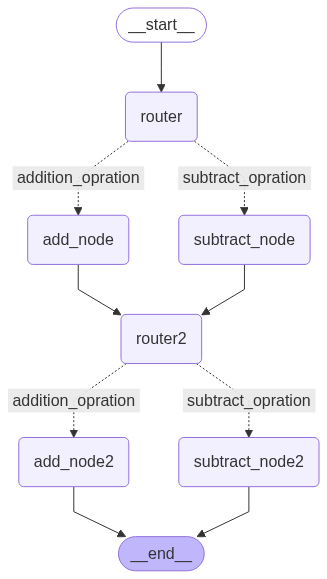

In [55]:

display(Image(app.get_graph().draw_mermaid_png()))

In [56]:
initial_state_1 = AgentState(number1=5 , number2=5 , opration="+" , finalNumber=0)
print(app.invoke(initial_state_1))

{'number1': 5, 'opration': '+', 'number2': 5, 'finalNumber': 0}
{'number1': 5, 'opration': '+', 'number2': 5, 'finalNumber': 10}
{'number1': 5, 'opration': '+', 'number2': 5, 'finalNumber': 10}
{'number1': 5, 'opration': '+', 'number2': 5, 'finalNumber': 20}
{'number1': 5, 'opration': '+', 'number2': 5, 'finalNumber': 20}
